In [10]:
import tensorflow as tf
from functionsTF import *
from functions import *
from IO import *

%load_ext autoreload
%autoreload 2

import time
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt
import seaborn as sns
#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import mutual_info

In [12]:
N = 400
T = 80

DEVICE = '/cpu:0'

In [13]:
# disp = True
# tauv = 45
# sG = 50
# N = N
# both=False

# ### input 1: apple
# gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG, device=DEVICE, both=both)
# apple = generateInput(3, T)
# gpu.input = apple
# gpu.both = True
# gpu.runTFSimul()
# apple_out = gpu.vvm[-1000:]

In [14]:
# plt.plot(gpu.vvmN2)

In [15]:
# # plt.plot(gpu.vvmN1)
# # plt.plot(gpu.vvmN2)
# print(mutual_info.mutual_information_2d((gpu.vvmN1), (gpu.vvmN2)))
# print(np.corrcoef(gpu.vvmN1,gpu.vvmN2)[0,1])

In [16]:
# for T in [4000, 8000, 60000]:
#     for both in [True, False]:
#         for N in [400]:
#             for sG in [0,10,20,50]:
#                 for tauv in np.arange(15,95,5):
#                     ### input 1: apple
#                     disp=False
#                     gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG, device=DEVICE, both=both, spikeMonitor=False)
#                     np.random.seed(2)
#                     gpu.input = apple
#                     gpu.runTFSimul()
#                     apple_out = gpu.vvm[-1000:]

#                     filename = "MI_both-%s_tauv-%d_sg-%d_N-%d_input-%s_T=%d" % (str(both), tauv,sG, N, 'test', T)
#                     with open(filename, 'wb') as f:
#                         np.savez(f,vvmN1 = gpu.vvmN1, vvmN2 = gpu.vvmN2, 
#                                 cor1 = np.corrcoef(gpu.vvmN1[100:1100], gpu.vvmN2[100:1100])[0,1], 
#                                 cor2 = np.corrcoef(gpu.vvmN1[-1001:-1], gpu.vvmN2[-1001:-1])[0,1],
# #                                 mutual_info.mutual_information_2d((gpu.vvmN1[100:1100]), (gpu.vvmN2[100:1100])),
# #                                 mutual_info.mutual_information_2d((gpu.vvmN1[-1001:-1]), (gpu.vvmN2[-1001:-1]))
#                                 )

In [17]:
# df = pd.DataFrame(columns=('tauv', 'sG', 'both', 'T', 'N', 
#                            'corN1_apple', 'corN2_apple','corN1_pear', 'corN2_pear', 'corChange_apple', 'corChange_pear', 
#                            'm1s', 'm1e','m2s', 'm2e', 'mChangeN1', 'mChangeN2',
#                            'm1s_pear', 'm1e_pear', 'm2s_pear', 'm2e_pear', 'mChangeN1_pear', 'mChangeN2_pear') )
# i=-1
# d = 500
# sigma = 2
# for T in [6000, 10000, 60000]:
#     apple = generateInput(2, T, 60)
#     pear = generateInput(3, T, 60)
#     for both in [ False, True]:
#         for N in [400]:
#             for sG in [0,10,20,50]:
#                 for tauv in np.arange(15,95,5):
#                     try:
#                         i+=1
#                         filename = "../data/MI6-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T=%d" % (str(both), tauv,sG, N, 'test', T)
#                         a = np.load(filename)
#                         cor1 = np.corrcoef(a['vvmN1'][100:100+d], a['vvmN2'][100:100+d])[0,1]
#                         cor2 = np.corrcoef(a['vvmN1'][T-d:T], a['vvmN2'][T-d:T])[0,1]
#                         cor1_2 = np.corrcoef(a['vvmN1_2'][100:100+d], a['vvmN2_2'][100:100+d])[0,1]
#                         cor2_2 = np.corrcoef(a['vvmN1_2'][T-d:T], a['vvmN2_2'][T-d:T])[0,1]
#                         corChange = cor2/cor1
#                         corChange_2 = cor2_2/cor1_2
#     #                     m1 = float(mutual_info.mutual_information_2d((a['vvmN1'][100:100+d]), (a['vvmN2'][100:100+d]), 
#     #                                                                  normalized=False, sigma=sigma) )
#     #                     m2 = float(mutual_info.mutual_information_2d((a['vvmN1'][T-d:T]), (a['vvmN2'][T-d:T]), 
#     #                                                                 normalized=False, sigma=sigma))
#                         m1s = float(mutual_info.mutual_information_2d((apple[100:100+d]), (a['vvmN1'][100:100+d]), 
#                                                                      normalized=False, sigma=sigma) )
#                         m1e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (a['vvmN1'][T-d:T]), 
#                                                                     normalized=False, sigma=sigma))
#                         m2s = float(mutual_info.mutual_information_2d((apple[100:100+d]), (a['vvmN2'][100:100+d]), 
#                                                                      normalized=False, sigma=sigma) )
#                         m2e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (a['vvmN2'][T-d:T]), 
#                                                                     normalized=False, sigma=sigma))
#                         mChangeN1 = m1e/m1s
#                         mChangeN2 = m2e/m2s

#                         m1s_pear = float(mutual_info.mutual_information_2d((pear[100:100+d]), (a['vvmN1_2'][100:100+d]), 
#                                                                      normalized=False, sigma=sigma) )
#                         m1e_pear = float(mutual_info.mutual_information_2d((pear[T-d:T]), (a['vvmN1_2'][T-d:T]), 
#                                                                     normalized=False, sigma=sigma))
#                         m2s_pear = float(mutual_info.mutual_information_2d((pear[100:100+d]), (a['vvmN2_2'][100:100+d]), 
#                                                                      normalized=False, sigma=sigma) )
#                         m2e_pear = float(mutual_info.mutual_information_2d((pear[T-d:T]), (a['vvmN2_2'][T-d:T]), 
#                                                                     normalized=False, sigma=sigma))
#                         mChangeN1_pear = m1e_pear/m1s_pear
#                         mChangeN2_pear = m2e_pear/m2s_pear
#     #                     df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), float(a['cor1']), float(a['cor2']) ]
#                         df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), 
#                                      cor1, cor2, cor1_2, cor2_2,
#                                      corChange, corChange_2, 
#                                      m1s, m1e, m2s, m2e, mChangeN1, mChangeN2,
#                                      m1s_pear, m1e_pear, m2s_pear, m2e_pear, mChangeN1_pear, mChangeN2_pear]
#                     except:
#                         pass

In [18]:
# both = True
# tauv=85
# sG = 10
# N = 400
# filename = "MI4-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T=%d" % (str(both), tauv,sG, N, 'test', T)
# a = np.load(filename)
# plt.plot(a['vvmN2'][100:])
# # df[df['tauv']==15].tail()

In [21]:
df = pd.read_csv(DIRECTORY + 'MI10.csv')

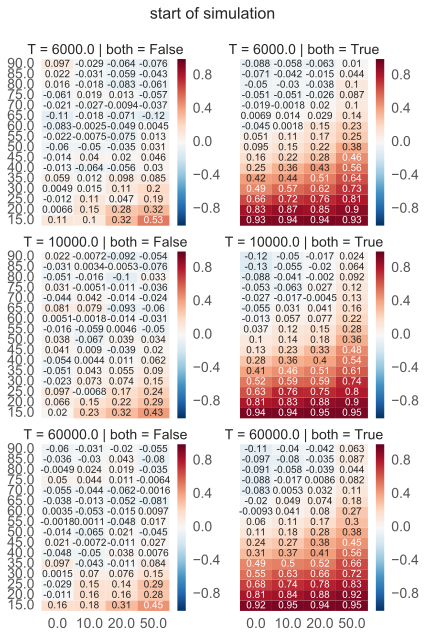

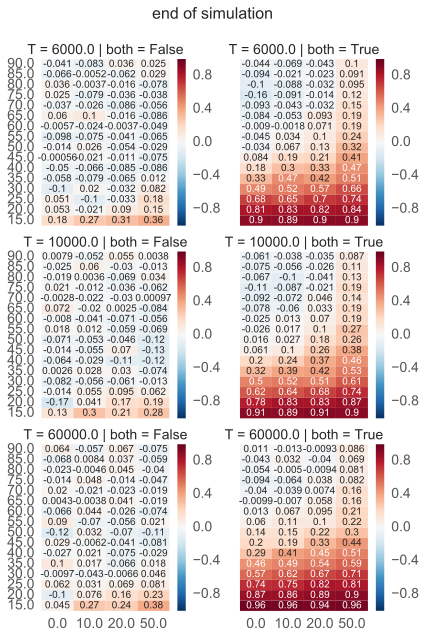

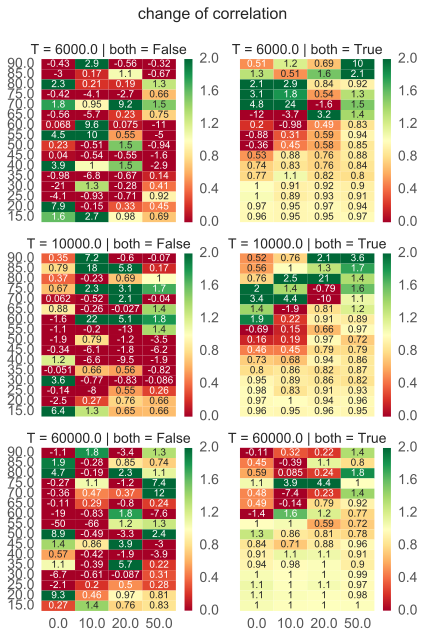

In [22]:
plotGrid(df, 'corS_apple', 'start of simulation', cmap="RdBu_r", vmin=-0.1, vmax=1.0, 
        cols = ['corS_apple', 'corE_apple', 'corChange_apple'])
plotGrid(df, 'corE_apple', 'end of simulation', cmap="RdBu_r", vmin=-.1, vmax=1.0,
        cols = ['corS_apple', 'corE_apple', 'corChange_apple'])
plotGrid(df, 'corChange_apple', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), vmin=0, vmax=2,
        cols = ['corS_apple', 'corE_apple', 'corChange_apple'])

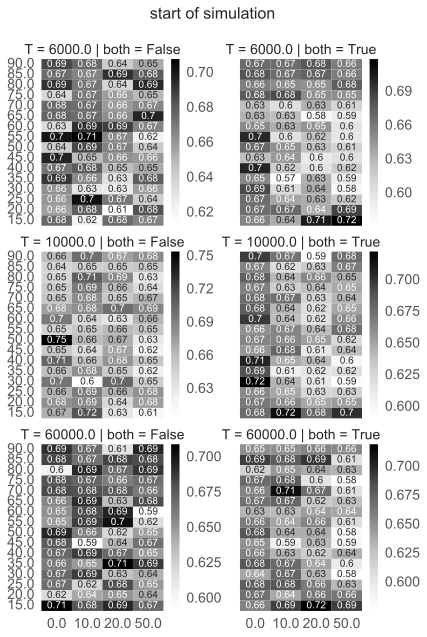

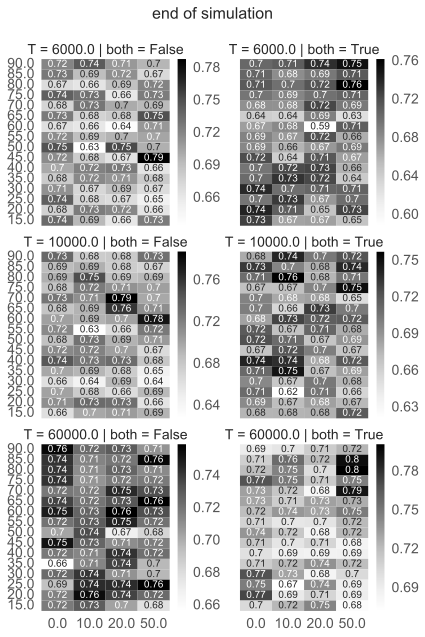

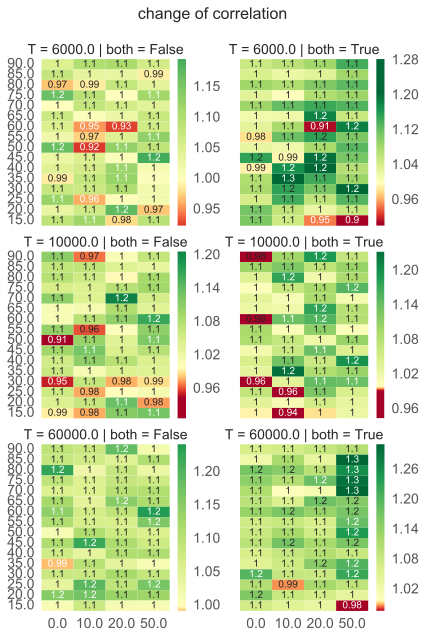

In [30]:
plotGrid(df, 'm1s', 'start of simulation', cmap="Greys", cols = ['m1s', 'm1e', 'mChangeN1'])
plotGrid(df, 'm1e', 'end of simulation', cmap="Greys", cols = ['m1s', 'm1e', 'mChangeN1'])
plotGrid(df, 'mChangeN1', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = ['m1s', 'm1e', 'mChangeN1'])

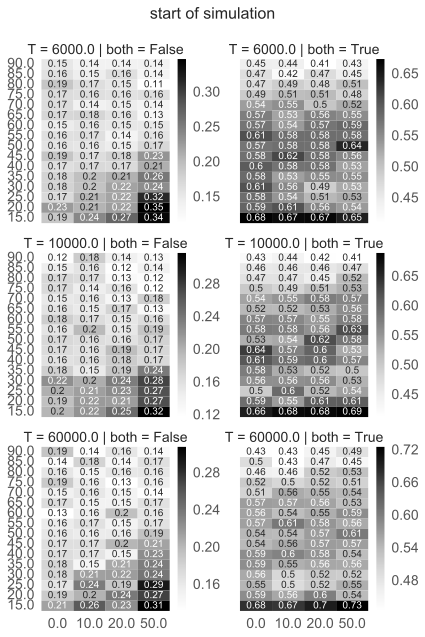

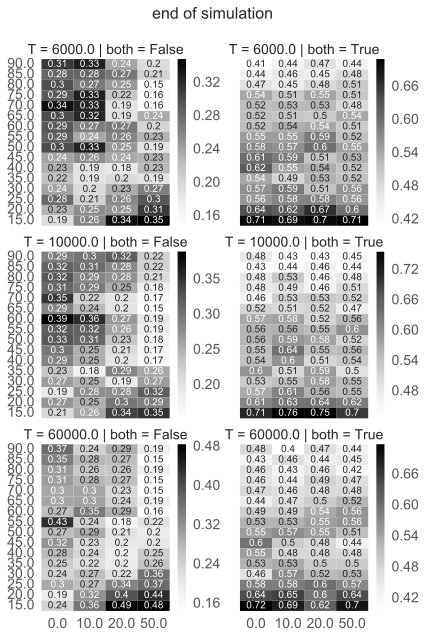

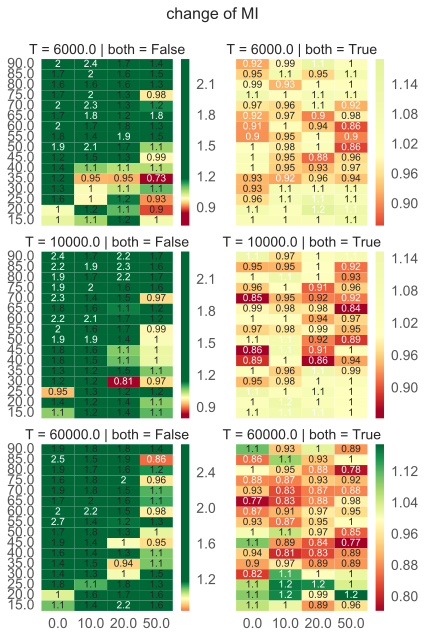

In [31]:
plotGrid(df, 'm2s', 'start of simulation', cmap="Greys", cols = ['m2s', 'm2e', 'mChangeN2'])
plotGrid(df, 'm2e', 'end of simulation', cmap="Greys", cols = ['m2s', 'm2e', 'mChangeN2'])
plotGrid(df, 'mChangeN2', 'change of MI',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = ['m2s', 'm2e', 'mChangeN2'])

## Fourier

In [ ]:
T = 10000
apple = generateInput(3, T, 60)
plt.plot(apple)
plt.savefig(DIRECTORY + 'apple.png')
plotFFT(apple, T)
plt.savefig(DIRECTORY + 'appleFFT.png')

In [ ]:
T = 10000
apple = generateInput(3, T, 5)
plt.plot(apple)
plt.savefig(DIRECTORY + 'pear.png')
plotFFT(apple, T)
plt.savefig(DIRECTORY + 'pearFFT.png')

In [ ]:
H, xedges, yedges = np.histogram2d(gpu.vvmN1, gpu.vvmN2, bins=(256,256))
im = plt.imshow(H, interpolation='nearest', origin='low',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [ ]:
apple = generateInput(3, T, 10)
pear = generateInput(3, T, 10)

# apple=np.random.randn(2,50000)
# pear = apple*2
mutual_info.mutual_information_2d(apple.ravel(),pear.ravel(), normalized=1)

In [ ]:
mod15 = resonanceFS(tauv=30)
F = np.logspace(0.5, 2.3, 200)
plt.semilogx(F, mod15/ np.nanmax(mod15), label='%.1f' % (F[np.argmax(mod15)]), color='c')
plt.legend()